In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [13]:
def load_lang_stat(stats_dir):
    df = pd.read_csv(Path(stats_dir)/'stats.tsv', sep='\t')
    df['part'] = str(stats_dir)
    return df


In [18]:
def plot_langs(ldf, lang_col='lang-descr', stat_col='text_bytes', part_col='part', height=30, aspect=0.3, 
               logscale=True, xticks=[10**i for i in range(0,15)]):
    my_plot=sns.catplot(kind='bar',data=ldf, y=lang_col, x=stat_col, hue=part_col,
                        palette='Set2',height=height, aspect=aspect)
    if logscale:
        plt.xscale('log')

    sns.set_theme(font = 'monospace')
    # _=plt.xticks(rotation=90)
    _=plt.xticks(ticks=xticks)
    return my_plot

In [20]:
def main(stats_dir):
    ldf = pd.concat((load_lang_stat(d) 
                     for d in (stats_dir,)
                    ), ignore_index=True)
    ldf=ldf.sort_values(by='text_bytes')    
    my_plot = plot_langs(ldf, lang_col='lang', part_col=None)
    my_plot.savefig(Path(stats_dir)/'lang_stats.png')

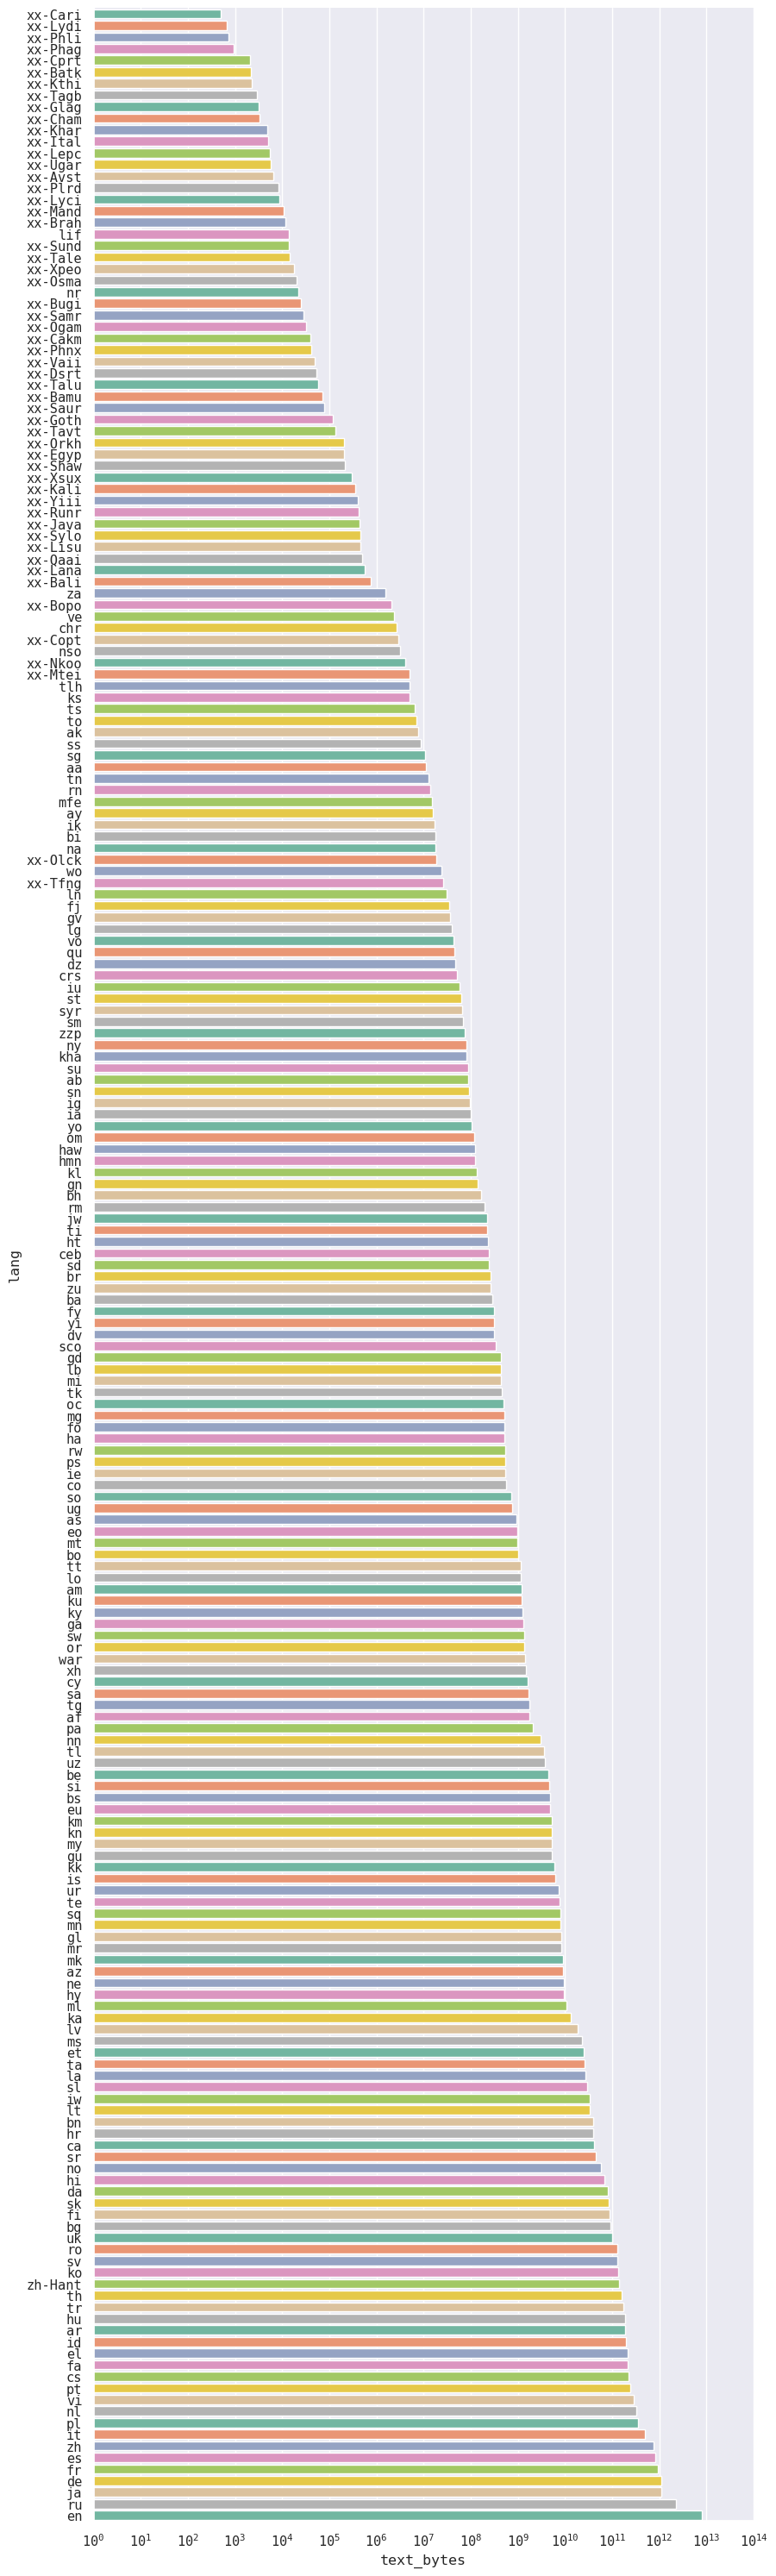

In [21]:
main('./output_CommonCrawl40_filtered_stats/')